# Actividad Evaluable: Patrones con K-means  
Pedro Andres Fernandez Lopez  
A01235998 - ITC

### Importamos las librerias

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns 

### Se carga el .csv con los datos

In [21]:
diabetes = pd.read_csv('diabetes.csv')

### Analisis de variables  
Para hacer un analisis de que tan utiles seran las variables para el procesamiento de los datos, mostrare los tipos de variables y creare una matriz de relacion para respresentar graficamente la relaciones entre las variables.

In [22]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Correccion de variables  
Algunos datos como 'BloodPressure' o 'BMI' no tiene sentido que sean 0, ya que es imposible, por esto, para evitar errores por la medicion de los datos, reemplazare estos por la media.

In [24]:
diabetes['BloodPressure'] = diabetes['BloodPressure'].replace(0,diabetes['BloodPressure'].median())
diabetes['BMI'] = diabetes['BMI'].replace(0,diabetes['BMI'].median())

In [18]:
diabetes.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                46
SkinThickness                51
Insulin                     186
BMI                         247
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

<AxesSubplot:>

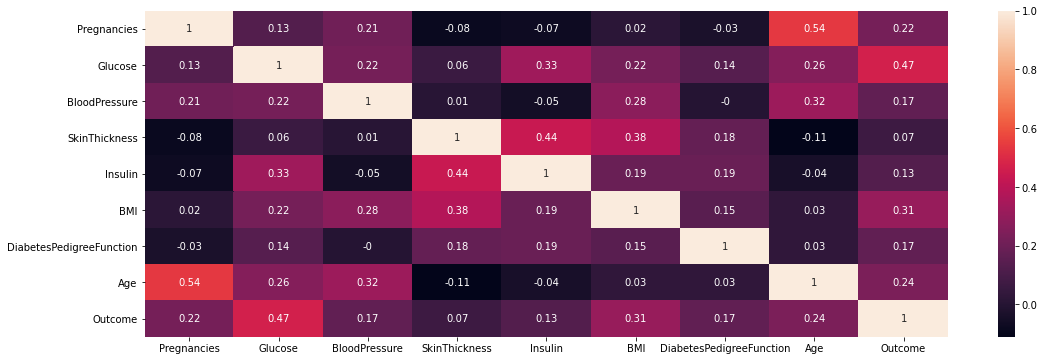

In [19]:
fig = plt.figure(figsize=(18,6))
correlation_matrix = diabetes.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

### Lables

In [63]:
print(kmeans.labels_)

[1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1
 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1
 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1
 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1
 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1
 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1
 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1
 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0
 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1
 0 0 0 1 1 1 1 0 1 0 0 0 

### Analisis de las variables  
En primera instancia, tenemos que identificar que variables son importantes para llegar a una conclusion sobre los datos, sabemos que la variable mas importante es la de 'Outcome' ya que todas las demas se toman en cuenta para llegar a el resultado final 'Outcome', para simplificar el problema, eliminare las variables con menos relacion a 'Outcome' que juzgando por la mariz mostrada, son 'SkinThickness' y 'Insulin'.

### Determinacion de el valor de 'k'  
Para determinar el valor de 'k' tenemos que ver en cuantos grupos generales podemos dividir a los datos, en este caso, la respuesta es simple, los grupos mas importantes son, los que son diganosicados con diabetes y los que no.

### Obteniendo centros con algoritmo k-means en scikitlearn  
Para preparar la matriz de datos, eliminare las variables que anteriormente mencione que no servirian de mucho y tambien quitare la variable 'Outcome' ya que se determino que esa depende de las demas variables.

In [34]:
diabetes_prep = diabetes.drop(['SkinThickness','Insulin','Outcome'], axis=1)

In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
kmeans = KMeans(n_clusters=2)
kmeans.fit(diabetes_prep)

print(kmeans.cluster_centers_)
euclidean_distances(kmeans.cluster_centers_)

[[  3.43407708 101.84989858  70.01825558  31.24604462   0.44773631
   30.59026369]
 [  4.58181818 155.03636364  76.63272727  34.61090909   0.51515273
   37.99272727]]


array([[ 0.        , 54.22169248],
       [54.22169248,  0.        ]])

### Preguntas  
**¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?**  
Yo creo que estos centros representan la tendencia de variables que definen si el paciente puede tener diabetes o no, ya que apartir de la matriz de relacion podemos definir que variables afectan de manera mas directa a el resultado 'Outcome', entonces pienso que estos centros obtenidos dejan un numero al que cuando se acercan las variables de un paciente, este sera mas o menos propenso a tener diabetes segun de la relacion de la variable con el outcome.

**¿Cómo obtuviste el valor de k a usar?**  
Obtuve que k debe de ser 2 al saber que el resultado solo puede ser verdadero o falso.

**¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?**  
No, yo creo que entre mas variables definidas en un cierto rango de valores (para evitar datos disrruptivos) se obtendira un resultado mas exacto.

**¿Qué distancia tienen los centros entre sí? ¿Hay alguno que este muy cercano a otros?**  
Utilizando la funcion de euclidean distance me dio una distancia de 54.22 en cada eje de los puntos.

**¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?**  
Serian datos que perdjudicarian la eficacia del metodo al estar tan dispersos y fuera del rango.

**¿Qué puedes decir de los datos basándose en los centros?**  
Puedo decir que los datos de [4.59854015 155.12408759 76.67153285 34.6120438 0.51631752 38.05109489] obtenidos por un centroide son mas propensos a tener diabetes si se acerca a estos valores para cada una de las variables,y al contrario, los otros se refieren a el promedio de los valores que tienden a dar un resultado negativo de diabetes.